# Import the libraries

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, PowerTransformer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,silhouette_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')


# Data Overview

In [44]:
df = pd.read_csv('Data\data.csv')

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               2240 non-null   int64  
 1   birth_year                2240 non-null   int64  
 2   education_level           2199 non-null   object 
 3   marital_status            2240 non-null   object 
 4   annual_income             2173 non-null   float64
 5   num_children              2240 non-null   int64  
 6   num_teenagers             2196 non-null   float64
 7   signup_date               2240 non-null   object 
 8   days_since_last_purchase  2240 non-null   int64  
 9   has_recent_complaint      2240 non-null   int64  
 10  spend_wine                2240 non-null   int64  
 11  spend_fruits              2240 non-null   int64  
 12  spend_meat                2240 non-null   int64  
 13  spend_fish                2240 non-null   int64  
 14  spend_sw

###### We need to convert "education_level", "marital_status", "signup_date"

In [46]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
customer_id,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
birth_year,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
annual_income,2173.0,52266.031293,25274.007394,1730.0,35196.00,51411.0,68487.00,666666.0
num_children,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
num_teenagers,2196.0,0.506375,0.543720,0.0,0.00,0.0,1.00,2.0
days_since_last_purchase,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
has_recent_complaint,2240.0,0.009375,0.096391,0.0,0.00,0.0,0.00,1.0
spend_wine,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
spend_fruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
spend_meat,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0


###### There are nulls

##### Count of values

In [47]:
counts_all = {col: df[col].value_counts() for col in df.columns}
counts_all

{'customer_id': customer_id
 5524     1
 2174     1
 4141     1
 6182     1
 5324     1
         ..
 10870    1
 4001     1
 7270     1
 8235     1
 9405     1
 Name: count, Length: 2240, dtype: int64,
 'birth_year': birth_year
 1976    89
 1971    87
 1975    83
 1972    79
 1978    77
 1970    77
 1965    74
 1973    74
 1969    71
 1974    69
 1956    55
 1979    53
 1958    53
 1977    52
 1952    52
 1959    51
 1968    51
 1966    50
 1954    50
 1955    49
 1960    49
 1963    45
 1982    45
 1967    44
 1962    44
 1957    43
 1951    43
 1983    42
 1986    42
 1964    42
 1981    39
 1980    39
 1984    38
 1961    36
 1953    35
 1985    32
 1949    30
 1989    30
 1950    29
 1988    29
 1987    27
 1948    21
 1990    18
 1946    16
 1947    16
 1991    15
 1992    13
 1945     8
 1943     7
 1944     7
 1995     5
 1993     5
 1994     3
 1996     2
 1900     1
 1893     1
 1899     1
 1941     1
 1940     1
 Name: count, dtype: int64,
 'education_level': education_level


###### These columns have a majority of zero values: 'has_recent_complaint', 'accepted_campaign_1', 'accepted_campaign_2', 'accepted_campaign_3', 'accepted_campaign_4', 'accepted_campaign_5', and 'accepted_last_campaign'. We will drop some or engineer a new feature.

In [48]:
backup = df.copy()

## Feature Extraction
We need to know whether the client will accept the next campaign or not.

In [49]:
campaign_columns = ['accepted_campaign_1', 'accepted_campaign_2', 'accepted_campaign_3', 'accepted_campaign_4', 'accepted_campaign_5', 'accepted_last_campaign']

- `.sum` when every column has a value.
- `.max` for an OR-style aggregation.
- `.min` for an AND-style aggregation.

In [50]:
df['total_accepted_campaigns'] = df[campaign_columns].max(axis=1)

In [51]:
df['total_accepted_campaigns'].value_counts()

total_accepted_campaigns
0    1631
1     609
Name: count, dtype: int64

In [52]:
ref_year = 2014
df['age'] = ref_year - df['birth_year']


def parse_date(s):
    for fmt in ('%d-%m-%Y','%d/%m/%Y','%m/%d/%Y','%d-%m-%y','%d/%m/%y'):
        try:
            return pd.to_datetime(s, format=fmt)
        except:
            continue
    # fallback: let pandas try
    try:
        return pd.to_datetime(s, dayfirst=True, errors='coerce')
    except:
        return pd.NaT

We use 2014 because this is the last year available in the signup data.

In [53]:
df['signup_date_parsed'] = df['signup_date'].apply(parse_date)
print("Unparsed signup_date:", df['signup_date_parsed'].isna().sum())

df['signup_year'] = df['signup_date_parsed'].dt.year.fillna(0).astype(int)

Unparsed signup_date: 0


We need to parse the `signup_date` column to a datetime type to create a signup year column.

##### Total Spend

In [54]:
total_spend = ['spend_wine', 'spend_fruits', 'spend_meat', 'spend_fish', 'spend_sweets', 'spend_gold']
df['total_spent'] = df[total_spend].sum(axis=1)

#### Total Purchases

In [55]:
total_purchases = ['num_discount_purchases', 'num_web_purchases', 'num_catalog_purchases', 'num_store_purchases']
df['total_purchases'] = df[total_purchases].sum(axis=1)

### Clean the data

In [56]:
df.drop(columns=['has_recent_complaint','accepted_campaign_1','accepted_campaign_2','accepted_campaign_3','accepted_campaign_4','accepted_campaign_5','accepted_last_campaign','customer_id','signup_date_parsed', 'birth_year', 'signup_date'],axis=1,inplace=True)
df.head()

,education_level,marital_status,annual_income,num_children,num_teenagers,days_since_last_purchase,spend_wine,spend_fruits,spend_meat,spend_fish,...,num_discount_purchases,num_web_purchases,num_catalog_purchases,num_store_purchases,web_visits_last_month,total_accepted_campaigns,age,signup_year,total_spent,total_purchases
0,Graduation,Single,58138.0,0,0.0,58,635,88,546,172,...,3,8,10,4,7,1,57,2012,1617,25
1,Graduation,Single,46344.0,1,1.0,38,11,1,6,2,...,2,1,1,2,5,0,60,2014,27,6
2,Graduation,Together,71613.0,0,0.0,26,426,49,127,111,...,1,8,2,10,4,0,49,2013,776,21
3,Graduation,Together,26646.0,1,0.0,26,11,4,20,10,...,2,2,0,4,6,0,30,2014,53,8
4,PhD,Married,58293.0,1,0.0,94,173,43,118,46,...,5,5,3,6,5,0,33,2014,422,19


In [57]:
df.isnull().sum()

education_level             41
marital_status               0
annual_income               67
num_children                 0
num_teenagers               44
days_since_last_purchase     0
spend_wine                   0
spend_fruits                 0
spend_meat                   0
spend_fish                   0
spend_sweets                 0
spend_gold                   0
num_discount_purchases       0
num_web_purchases            0
num_catalog_purchases        0
num_store_purchases          0
web_visits_last_month        0
total_accepted_campaigns     0
age                          0
signup_year                  0
total_spent                  0
total_purchases              0
dtype: int64

###### I will try the median

In [58]:
df['num_teenagers'].fillna(df['num_teenagers'].mode()[0], inplace=True)

In [59]:
df['education_level'].fillna(df['education_level'].mode()[0], inplace=True)

In [60]:
df['annual_income'].fillna(df['annual_income'].mode()[0], inplace=True)

##### duplicates

In [61]:
df.duplicated().sum()

np.int64(172)

In [62]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

In [63]:
df.nunique()

education_level                5
marital_status                 8
annual_income               1938
num_children                   3
num_teenagers                  3
days_since_last_purchase     100
spend_wine                   776
spend_fruits                 158
spend_meat                   558
spend_fish                   182
spend_sweets                 177
spend_gold                   213
num_discount_purchases        15
num_web_purchases             15
num_catalog_purchases         14
num_store_purchases           14
web_visits_last_month         16
total_accepted_campaigns       2
age                           59
signup_year                    3
total_spent                 1054
total_purchases               39
dtype: int64

### Numerical Columns

In [64]:
numerical_cols = ['annual_income', 'days_since_last_purchase',
'spend_wine', 'spend_fruits', 'spend_meat', 'spend_fish',
'spend_sweets', 'spend_gold', 'num_discount_purchases',
'num_web_purchases', 'num_catalog_purchases', 'num_store_purchases',
'web_visits_last_month','age', 'total_spent', 'total_purchases']

num_cols = df[numerical_cols]
num_cols

,annual_income,days_since_last_purchase,spend_wine,spend_fruits,spend_meat,spend_fish,spend_sweets,spend_gold,num_discount_purchases,num_web_purchases,num_catalog_purchases,num_store_purchases,web_visits_last_month,age,total_spent,total_purchases
0,58138.0,58,635,88,546,172,88,88,3,8,10,4,7,57,1617,25
1,46344.0,38,11,1,6,2,1,6,2,1,1,2,5,60,27,6
2,71613.0,26,426,49,127,111,21,42,1,8,2,10,4,49,776,21
3,26646.0,26,11,4,20,10,3,5,2,2,0,4,6,30,53,8
4,58293.0,94,173,43,118,46,27,15,5,5,3,6,5,33,422,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,61223.0,46,709,43,182,42,118,247,2,9,3,4,5,47,1341,18
2236,64014.0,56,406,0,30,0,0,8,7,8,2,5,7,68,444,22
2237,56981.0,91,908,48,217,32,12,24,1,2,3,13,6,33,1241,19
2238,69245.0,8,428,30,214,80,30,61,2,6,5,10,3,58,843,23


##### Categorical Columns

In [65]:
categorical_cols = ['signup_year','total_accepted_campaigns', 'num_children', 'num_teenagers','education_level', 'marital_status']
cat_cols = df[categorical_cols]
cat_cols

,signup_year,total_accepted_campaigns,num_children,num_teenagers,education_level,marital_status
0,2012,1,0,0.0,Graduation,Single
1,2014,0,1,1.0,Graduation,Single
2,2013,0,0,0.0,Graduation,Together
3,2014,0,1,0.0,Graduation,Together
4,2014,0,1,0.0,PhD,Married
...,...,...,...,...,...,...
2235,2013,0,0,1.0,Graduation,Married
2236,2014,1,2,1.0,PhD,Together
2237,2014,1,0,0.0,Graduation,Divorced
2238,2014,0,0,1.0,Master,Together


# EDA


## Analyze Numerical Feature Distributions

Visualize the distributions of numerical features using histograms and box plots to identify their spread, central tendency, and potential outliers.


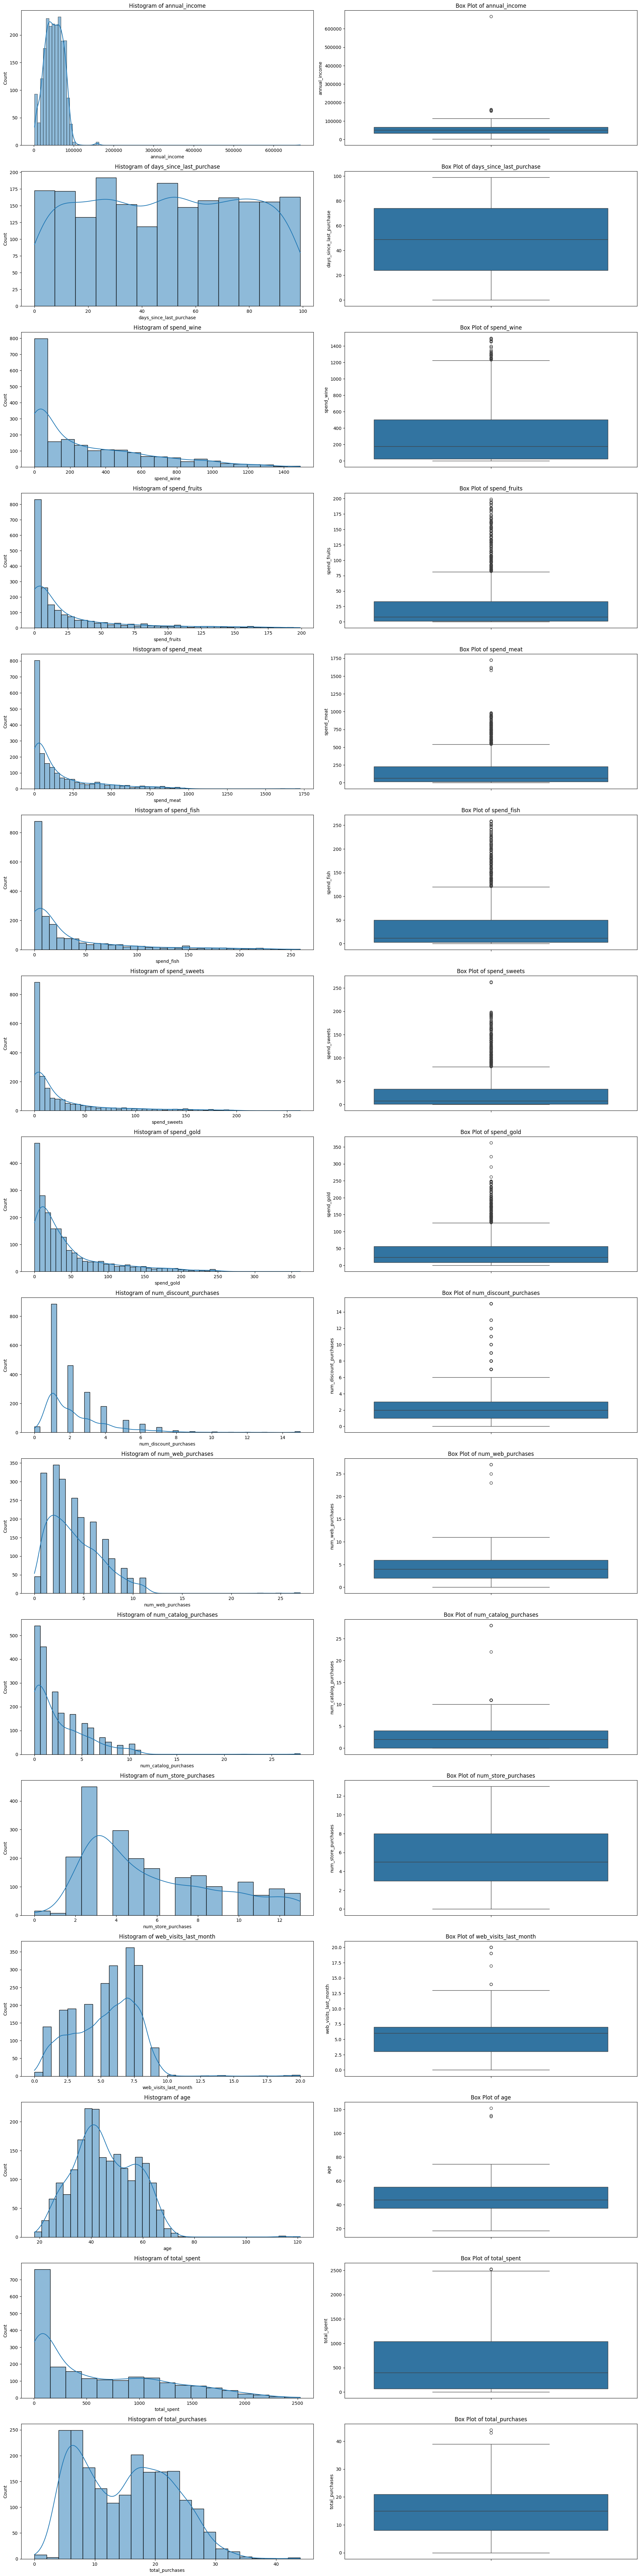

In [66]:
plt.figure(figsize=(20, 5 * len(num_cols)))

for i, col in enumerate(num_cols):
    plt.subplot(len(num_cols), 2, 2*i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram of {col}')

    plt.subplot(len(num_cols), 2, 2*i + 2)
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of {col}')

plt.tight_layout()
plt.show()

## Analyze Categorical Feature Distributions


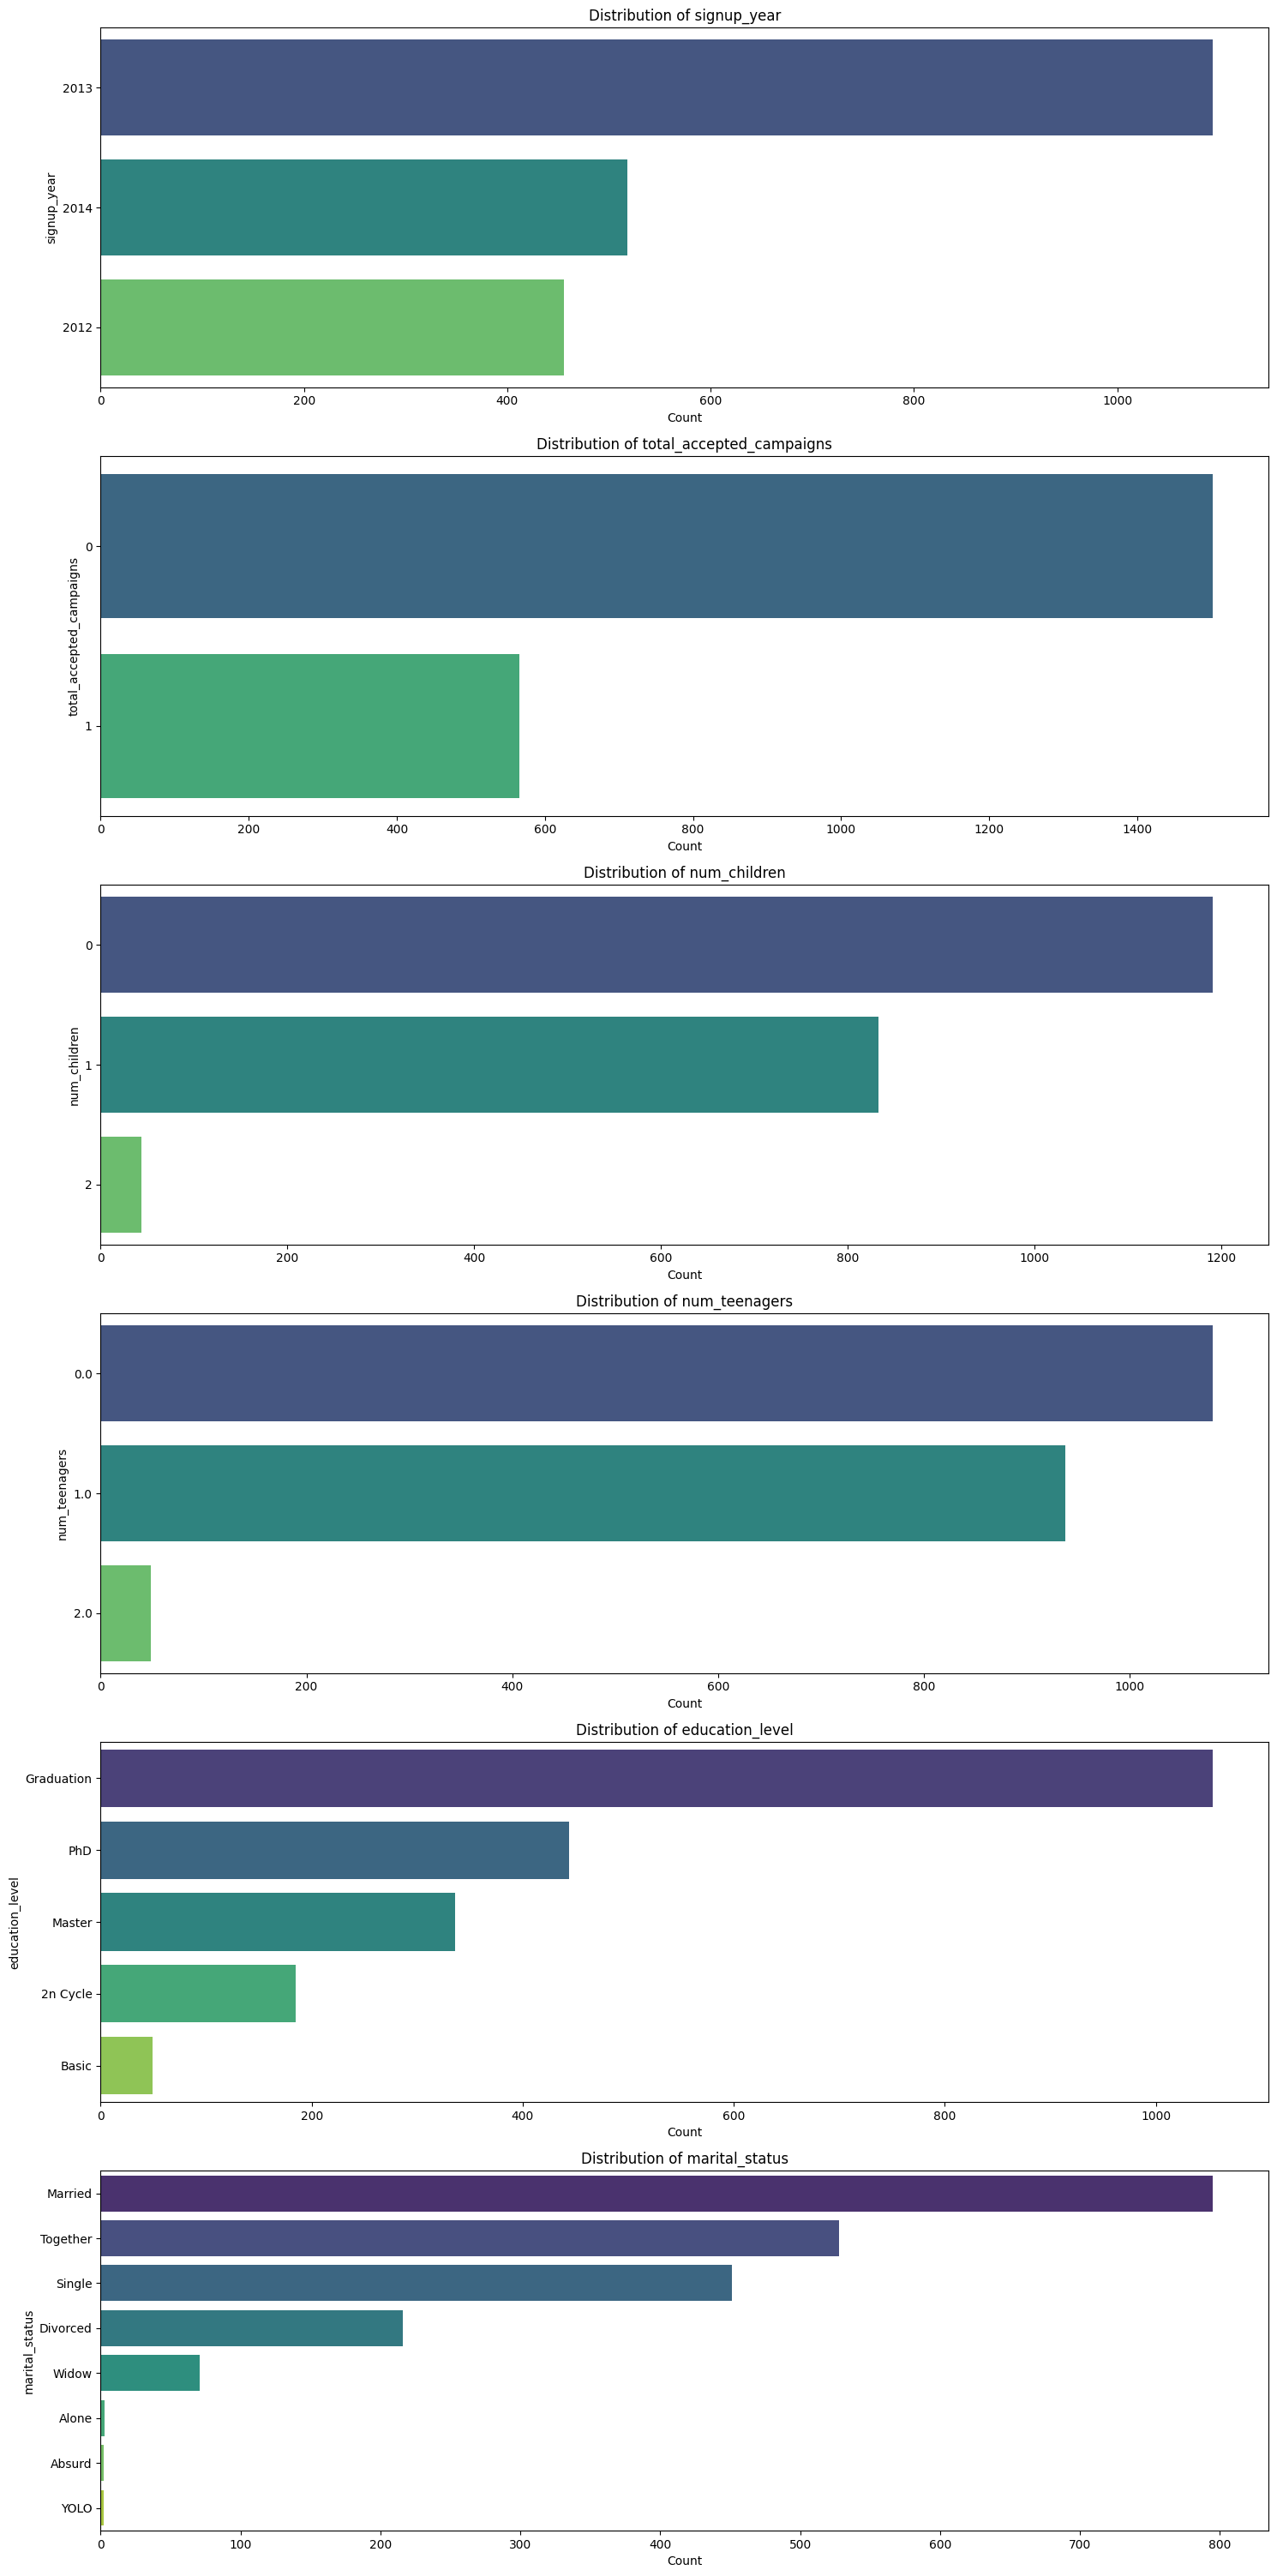

In [67]:
plt.figure(figsize=(15, 5 * len(cat_cols)))

for i, col in enumerate(categorical_cols):
    plt.subplot(len(cat_cols), 1, i + 1)
    sns.countplot(y=df[col], order=df[col].value_counts().index, palette='viridis')
    plt.title(f'Distribution of {col}')
    plt.xlabel('Count')
    plt.ylabel(col)

plt.tight_layout()
plt.show()


## Analyze Numerical Feature Correlations

### Subtask:
Explore correlations between numerical features using a heatmap to identify strong positive or negative relationships.

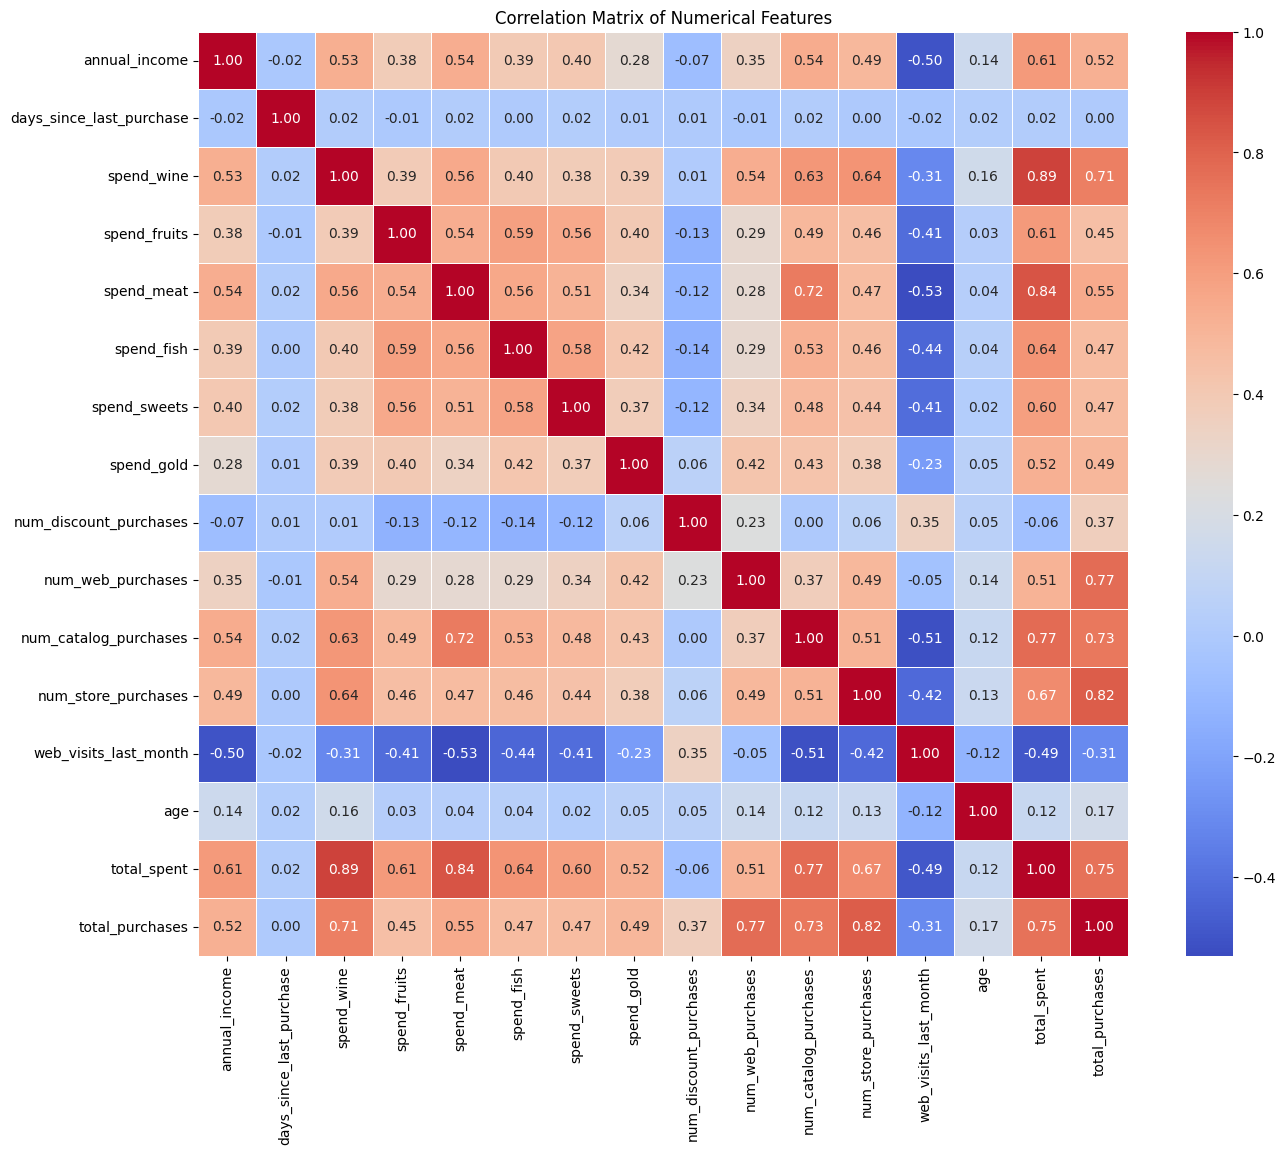

Generated a heatmap of correlations between numerical features.


In [68]:
correlation_matrix = df[num_cols.columns].corr()

plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()
print("Generated a heatmap of correlations between numerical features.")

## Analyze `total_accepted_campaigns` Feature

### Subtask:
Examine the distribution and relationships of the 'total_accepted_campaigns' feature.

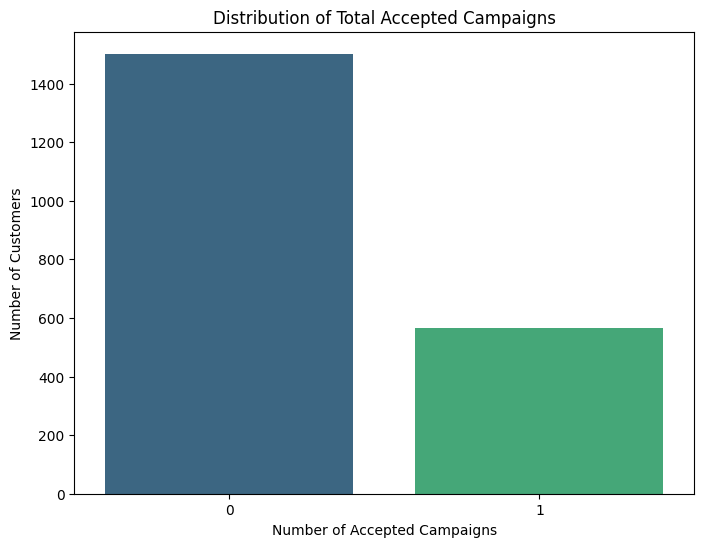

In [69]:
plt.figure(figsize=(8, 6))
sns.countplot(x='total_accepted_campaigns', data=df, palette='viridis')
plt.title('Distribution of Total Accepted Campaigns')
plt.xlabel('Number of Accepted Campaigns')
plt.ylabel('Number of Customers')
plt.show()


## Analyze 'total_accepted_campaigns' feature relationships

relationships between 'total_accepted_campaigns' and other relevant features, such as 'annual_income' and 'education_level'.


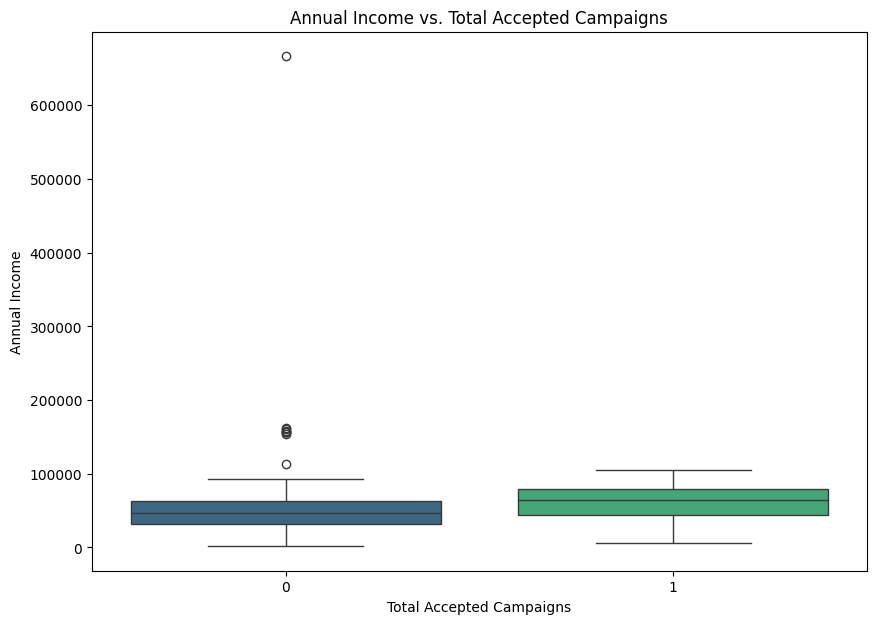

In [70]:
plt.figure(figsize=(10, 7))
sns.boxplot(x='total_accepted_campaigns', y='annual_income', data=df, palette='viridis')
plt.title('Annual Income vs. Total Accepted Campaigns')
plt.xlabel('Total Accepted Campaigns')
plt.ylabel('Annual Income')
plt.show()


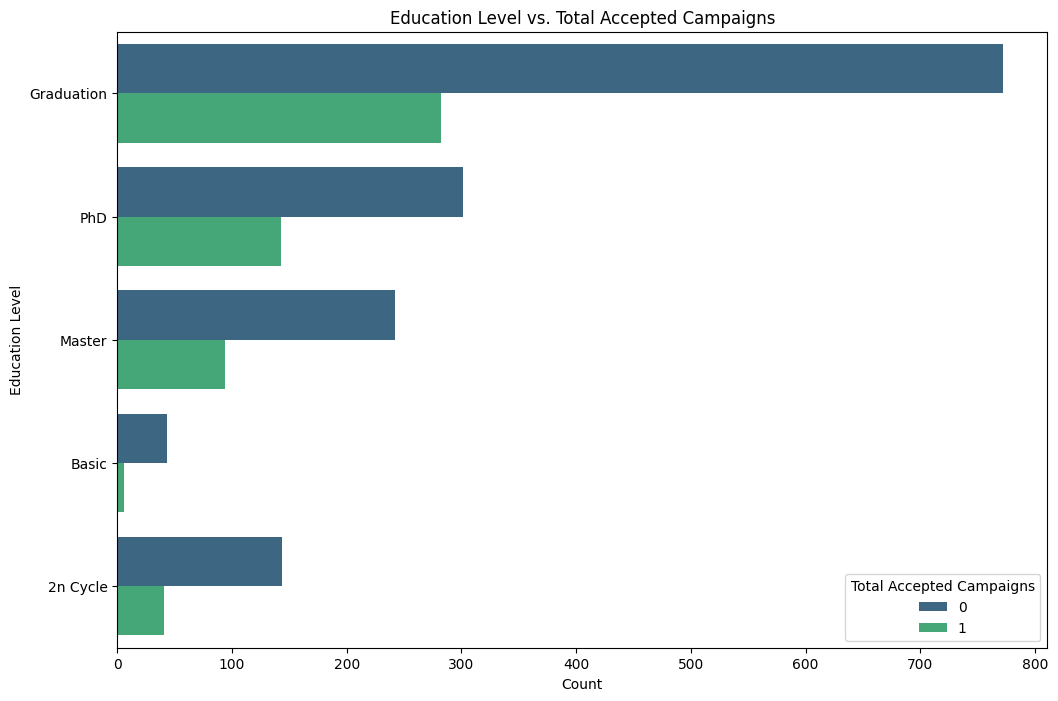

In [71]:
plt.figure(figsize=(12, 8))
sns.countplot(y='education_level', hue='total_accepted_campaigns', data=df, palette='viridis')
plt.title('Education Level vs. Total Accepted Campaigns')
plt.xlabel('Count')
plt.ylabel('Education Level')
plt.legend(title='Total Accepted Campaigns')
plt.show()


# Preprocessing

#### Handle outliers

In [72]:
for col in num_cols.columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers_iqr = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)
    # print(f"Outliers detected by IQR:\n{outliers_iqr}")
    print (outliers_iqr.count())



education_level             8
marital_status              8
annual_income               8
num_children                8
num_teenagers               8
days_since_last_purchase    8
spend_wine                  8
spend_fruits                8
spend_meat                  8
spend_fish                  8
spend_sweets                8
spend_gold                  8
num_discount_purchases      8
num_web_purchases           8
num_catalog_purchases       8
num_store_purchases         8
web_visits_last_month       8
total_accepted_campaigns    8
age                         8
signup_year                 8
total_spent                 8
total_purchases             8
dtype: int64
education_level             0
marital_status              0
annual_income               0
num_children                0
num_teenagers               0
days_since_last_purchase    0
spend_wine                  0
spend_fruits                0
spend_meat                  0
spend_fish                  0
spend_sweets               

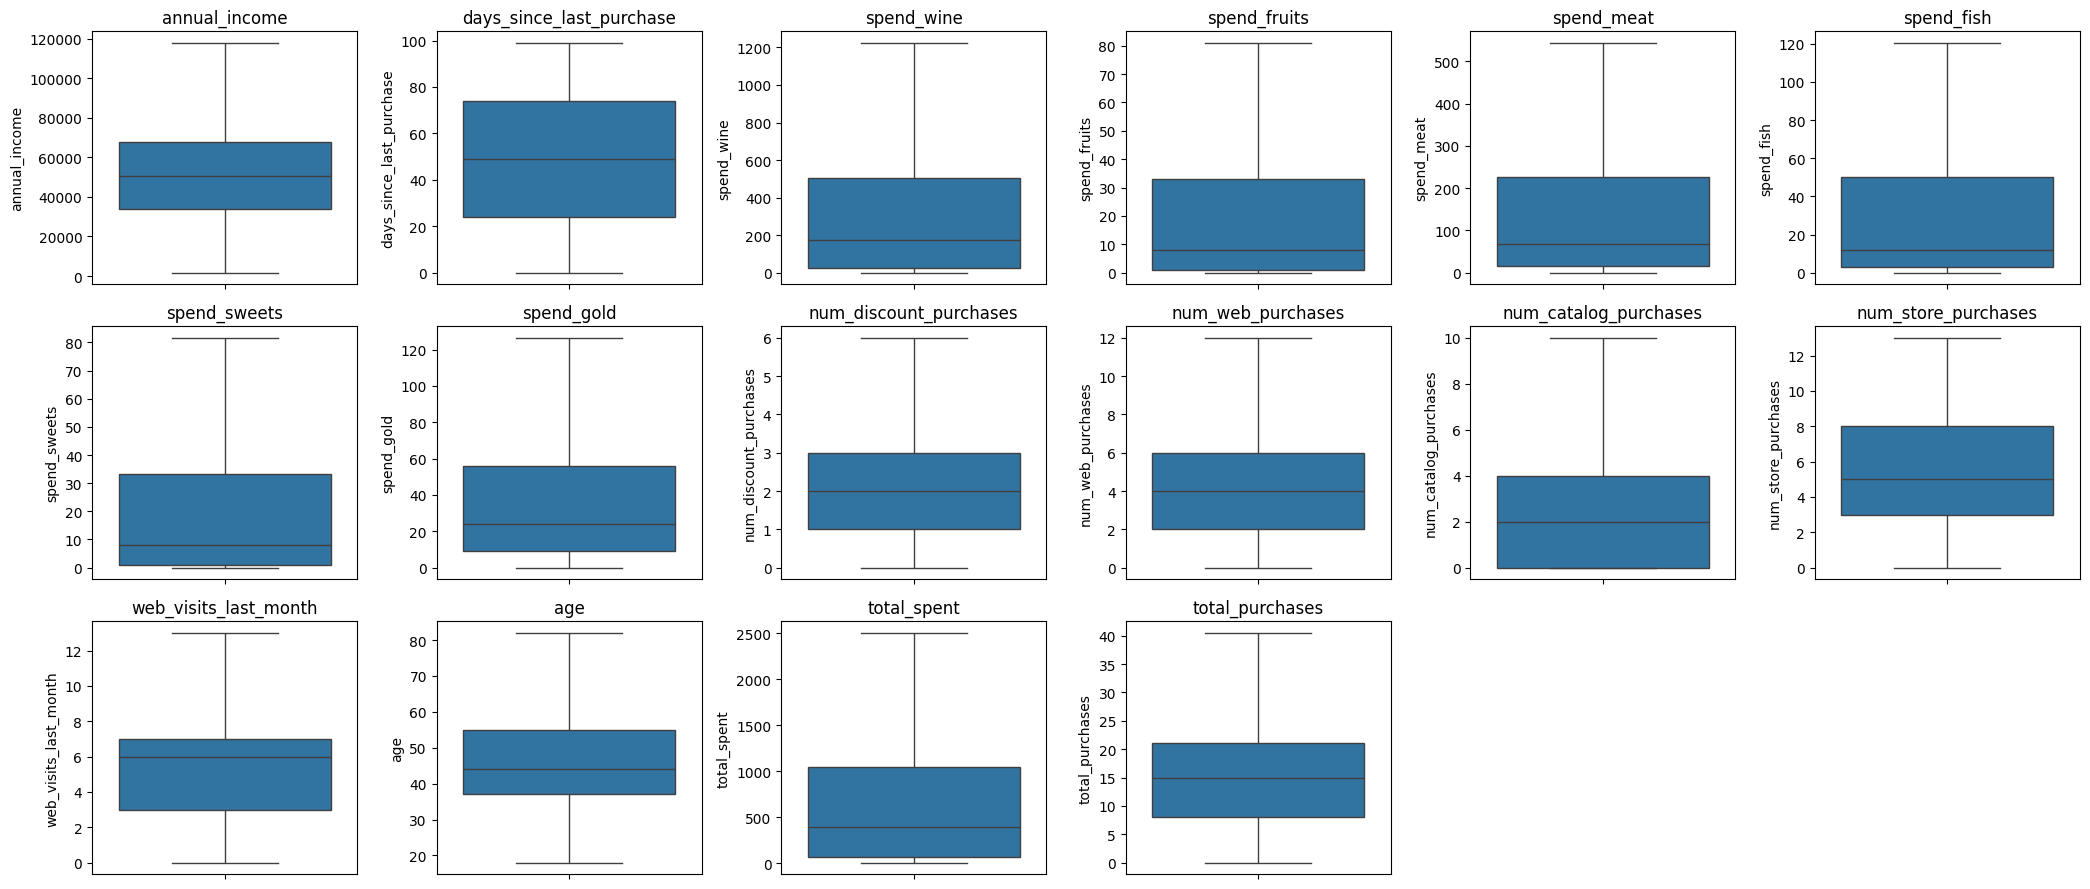

In [73]:
num_plots = len(num_cols.columns)
cols = 6
rows = (num_plots + cols - 1) // cols
fig, axes = plt.subplots(rows, cols, figsize=(cols * 3.5, rows * 3))
axes = axes.flatten() # make the loop work on 1D array instead of 2D 

for ax, col in zip(axes, num_cols.columns):  # zip for handle the design 
    sns.boxplot(y=df[col], ax=ax)
    ax.set_title(col)

for ax in axes[num_plots:]:
    ax.axis('off')

plt.tight_layout()
plt.show()

### Encoding

In [74]:
label_encoder= LabelEncoder()

df['education_level'] = label_encoder.fit_transform(df['education_level'])
df['marital_status'] = label_encoder.fit_transform(df['marital_status'])

In [75]:
df.head()

,education_level,marital_status,annual_income,num_children,num_teenagers,days_since_last_purchase,spend_wine,spend_fruits,spend_meat,spend_fish,...,num_discount_purchases,num_web_purchases,num_catalog_purchases,num_store_purchases,web_visits_last_month,total_accepted_campaigns,age,signup_year,total_spent,total_purchases
0,2,4,58138.0,0,0.0,58,635.0,81,544.125,120.5,...,3,8,10,4,7,1,57,2012,1617.0,25.0
1,2,4,46344.0,1,1.0,38,11.0,1,6.000,2.0,...,2,1,1,2,5,0,60,2014,27.0,6.0
2,2,5,71613.0,0,0.0,26,426.0,49,127.000,111.0,...,1,8,2,10,4,0,49,2013,776.0,21.0
3,2,5,26646.0,1,0.0,26,11.0,4,20.000,10.0,...,2,2,0,4,6,0,30,2014,53.0,8.0
4,4,3,58293.0,1,0.0,94,173.0,43,118.000,46.0,...,5,5,3,6,5,0,33,2014,422.0,19.0


### Normlization 

In [76]:
cols = ['annual_income','spend_wine', 'spend_fruits', 'spend_meat', 
        'spend_fish','spend_sweets', 'spend_gold', 
        'num_discount_purchases','num_web_purchases', 
        'num_catalog_purchases', 'num_store_purchases',
        'web_visits_last_month', 'total_spent']

pt = PowerTransformer(method='yeo-johnson')

df[cols] = pt.fit_transform(df[cols])
df.head()

,education_level,marital_status,annual_income,num_children,num_teenagers,days_since_last_purchase,spend_wine,spend_fruits,spend_meat,spend_fish,...,num_discount_purchases,num_web_purchases,num_catalog_purchases,num_store_purchases,web_visits_last_month,total_accepted_campaigns,age,signup_year,total_spent,total_purchases
0,2,4,0.364963,0,0.0,58,1.062930,1.490026,1.510771,1.495352,...,0.758459,1.350127,1.763341,-0.416819,0.718220,1,57,2012,1.318315,25.0
1,2,4,-0.157919,1,1.0,38,-1.216040,-0.997241,-1.376098,-0.876265,...,0.135420,-1.361495,-0.382271,-1.410449,-0.145284,0,60,2014,-1.440722,6.0
2,2,5,0.946399,0,0.0,26,0.746724,1.149404,0.457400,1.437814,...,-0.849171,1.350127,0.153675,1.248904,-0.569087,0,49,2013,0.658584,21.0
3,2,5,-1.072552,1,0.0,26,-1.216040,-0.398279,-0.723723,-0.098233,...,0.135420,-0.726501,-1.337841,-0.416819,0.284065,0,30,2014,-1.119585,8.0
4,4,3,0.371740,1,0.0,94,0.118264,1.061857,0.406999,0.839928,...,1.542208,0.517514,0.523986,0.273713,-0.145284,0,33,2014,0.174400,19.0


### Standardization

In [77]:
cols_to_standardize = [
    'annual_income',
    'age', 'signup_year', 
    'total_accepted_campaigns',
    'days_since_last_purchase',
    'spend_wine', 'spend_fruits', 
    'spend_meat', 'spend_fish', 
    'spend_sweets', 'spend_gold',
    'num_children', 'num_teenagers',
    'num_discount_purchases', 
    'num_web_purchases',
    'num_catalog_purchases', 
    'num_store_purchases',
    'web_visits_last_month',
    'total_spent', 'total_purchases'
]

scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[cols_to_standardize] = scaler.fit_transform(df[cols_to_standardize])


In [78]:
df_scaled.head()

,education_level,marital_status,annual_income,num_children,num_teenagers,days_since_last_purchase,spend_wine,spend_fruits,spend_meat,spend_fish,...,num_discount_purchases,num_web_purchases,num_catalog_purchases,num_store_purchases,web_visits_last_month,total_accepted_campaigns,age,signup_year,total_spent,total_purchases
0,2,4,0.364963,-0.827626,-0.918645,0.310222,1.062930,1.490026,1.510771,1.495352,...,0.758459,1.350127,1.763341,-0.416819,0.718220,1.629021,1.004894,-1.502241,1.318315,1.321932
1,2,4,-0.157919,1.030714,0.915098,-0.378827,-1.216040,-0.997241,-1.376098,-0.876265,...,0.135420,-1.361495,-0.382271,-1.410449,-0.145284,-0.613866,1.260454,1.414787,-1.440722,-1.161399
2,2,5,0.946399,-0.827626,-0.918645,-0.792256,0.746724,1.149404,0.457400,1.437814,...,-0.849171,1.350127,0.153675,1.248904,-0.569087,-0.613866,0.323403,-0.043727,0.658584,0.799126
3,2,5,-1.072552,1.030714,-0.918645,-0.792256,-1.216040,-0.398279,-0.723723,-0.098233,...,0.135420,-0.726501,-1.337841,-0.416819,0.284065,-0.613866,-1.295138,1.414787,-1.119585,-0.899996
4,4,3,0.371740,1.030714,-0.918645,1.550509,0.118264,1.061857,0.406999,0.839928,...,1.542208,0.517514,0.523986,0.273713,-0.145284,-0.613866,-1.039579,1.414787,0.174400,0.537722


## Clustering

### Finding the best K

In [79]:
ToVar = []
SilScore = []
StartK = 2
EndK = 15
clustering_features = [
    'annual_income',
    'spend_wine',
    'spend_fruits',
    'spend_meat',
    'spend_fish',
    'spend_sweets',
    'spend_gold',
    'signup_year',
    'days_since_last_purchase',
    'num_discount_purchases',
    'web_visits_last_month',
    'num_web_purchases',
    'num_catalog_purchases',
    'num_store_purchases',
    'age',
    'num_children',
    'num_teenagers',
    'total_accepted_campaigns',
    'education_level',
    'marital_status',
    'total_spent', 
    'total_purchases'
]
for k in range(StartK, EndK):
    kmeanModel = KMeans(n_clusters=k,init="k-means++",n_init="auto",random_state=10)
    kmeanModel.fit(df_scaled[clustering_features])
    SilScore.append(silhouette_score(df_scaled[clustering_features], kmeanModel.labels_))
    ToVar.append(kmeanModel.inertia_)


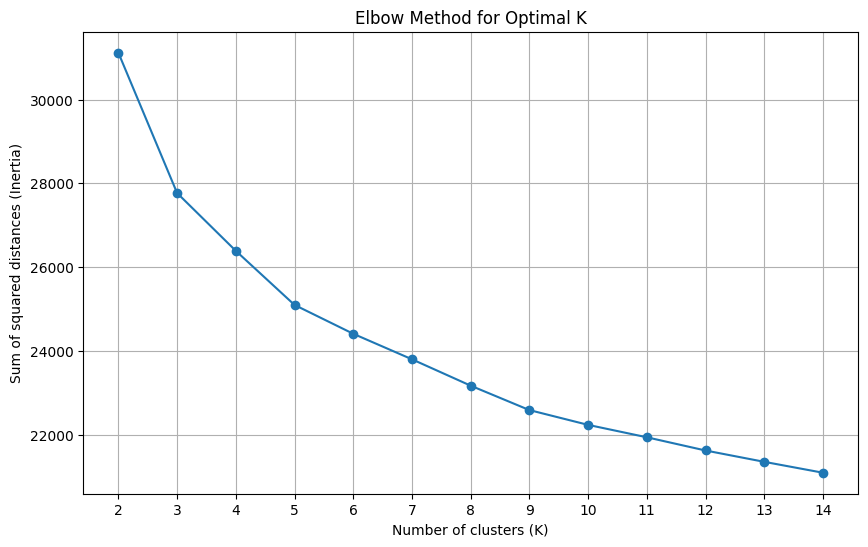

In [80]:
plt.figure(figsize=(10, 6))
plt.plot(range(StartK, EndK), ToVar, marker='o', linestyle='-')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Sum of squared distances (Inertia)')
plt.xticks(range(StartK, EndK))
plt.grid(True)
plt.show()

In [81]:
LoopResult = pd.DataFrame(np.arange(StartK,EndK,1),columns=['K_Values'])
LoopResult['Silhouette_Score'] = SilScore
LoopResult['Var'] = ToVar
LoopResult

,K_Values,Silhouette_Score,Var
0,2,0.282871,31115.582631
1,3,0.200021,27769.375757
2,4,0.132501,26391.056822
3,5,0.112916,25100.677735
4,6,0.100955,24412.990051
5,7,0.094848,23804.512085
6,8,0.087390,23175.371635
7,9,0.089344,22593.107465
8,10,0.085149,22240.366059
9,11,0.083027,21944.615886


## Clustering with K=6

In [82]:
kmeans = KMeans(n_clusters=6, init="k-means++", n_init="auto", random_state=0)
df_scaled['clusters'] = kmeans.fit_predict(df_scaled[clustering_features])


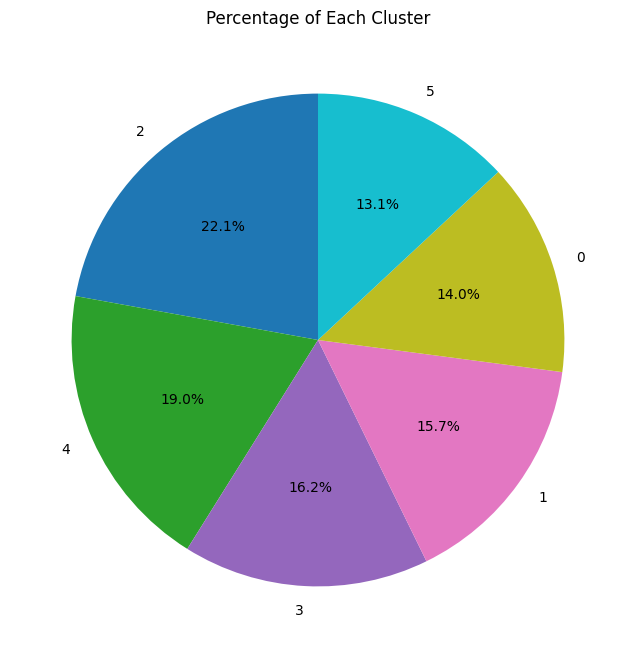

In [83]:
plt.figure(figsize=(8, 8))
df_scaled['clusters'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, cmap='tab10')
plt.title('Percentage of Each Cluster')
plt.ylabel('') # Hide the default 'clusters' label on the y-axis
plt.show()

## Analyze Cluster Profiles

Calculate the mean of each feature for every cluster to understand the distinct characteristics of each customer segment.


In [84]:
cluster_profiles = df_scaled.groupby('clusters')[clustering_features].mean()
print("Cluster profiles:")
print(cluster_profiles)

Cluster profiles:
          annual_income  spend_wine  spend_fruits  spend_meat  spend_fish  \
clusters                                                                    
0             -0.343074   -0.209208     -0.216816   -0.136901   -0.184450   
1              0.429627    0.727061      0.868476    0.732482    0.865131   
2              1.101071    0.916515      0.974634    1.203472    1.021778   
3             -0.552819   -0.908948     -1.112002   -1.173721   -1.103104   
4             -1.131372   -1.302567     -0.462805   -1.015933   -0.486692   
5              0.311634    0.813088     -0.415052    0.153540   -0.502098   

          spend_sweets  spend_gold  signup_year  days_since_last_purchase  \
clusters                                                                    
0            -0.213632   -0.003122    -0.280107                  0.084499   
1             0.889622    0.782460    -0.390349                  0.074265   
2             0.937776    0.607882     0.099577          

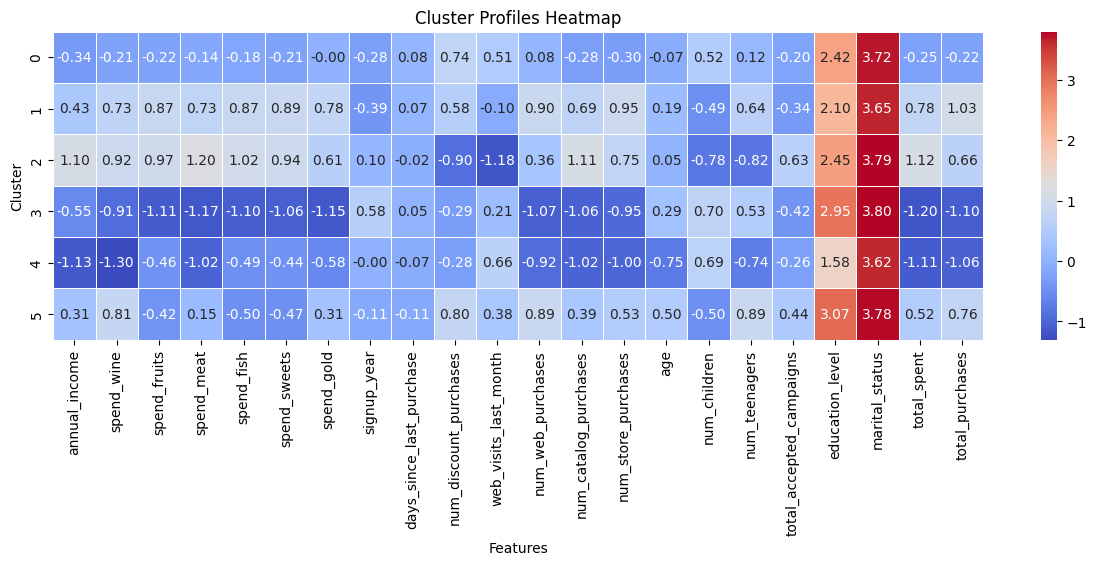

In [85]:
plt.figure(figsize=(15, 4))
sns.heatmap(cluster_profiles, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Cluster Profiles Heatmap')
plt.xlabel('Features')
plt.ylabel('Cluster')
plt.show()

### Data Analysis Key Findings

* Cluster 0 showed higher average spending on fruits and sweets.
* Cluster 1 had generally lower spending but higher average age and number of children.
* Cluster 2 had higher average spending.